In [39]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

In [40]:
url="https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&page=333"
header = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.5790.98 Safari/537.36"}
pages=requests.get(url,headers=header)
pages

<Response [200]>

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-HV7DJVVBCW"></script>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){dataLayer.push(arguments)},gtag("js",new Date),gtag("config","G-HV7DJVVBCW")</script>
<title>List of companies - 872.2k companies | AmbitionBox</title><meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_
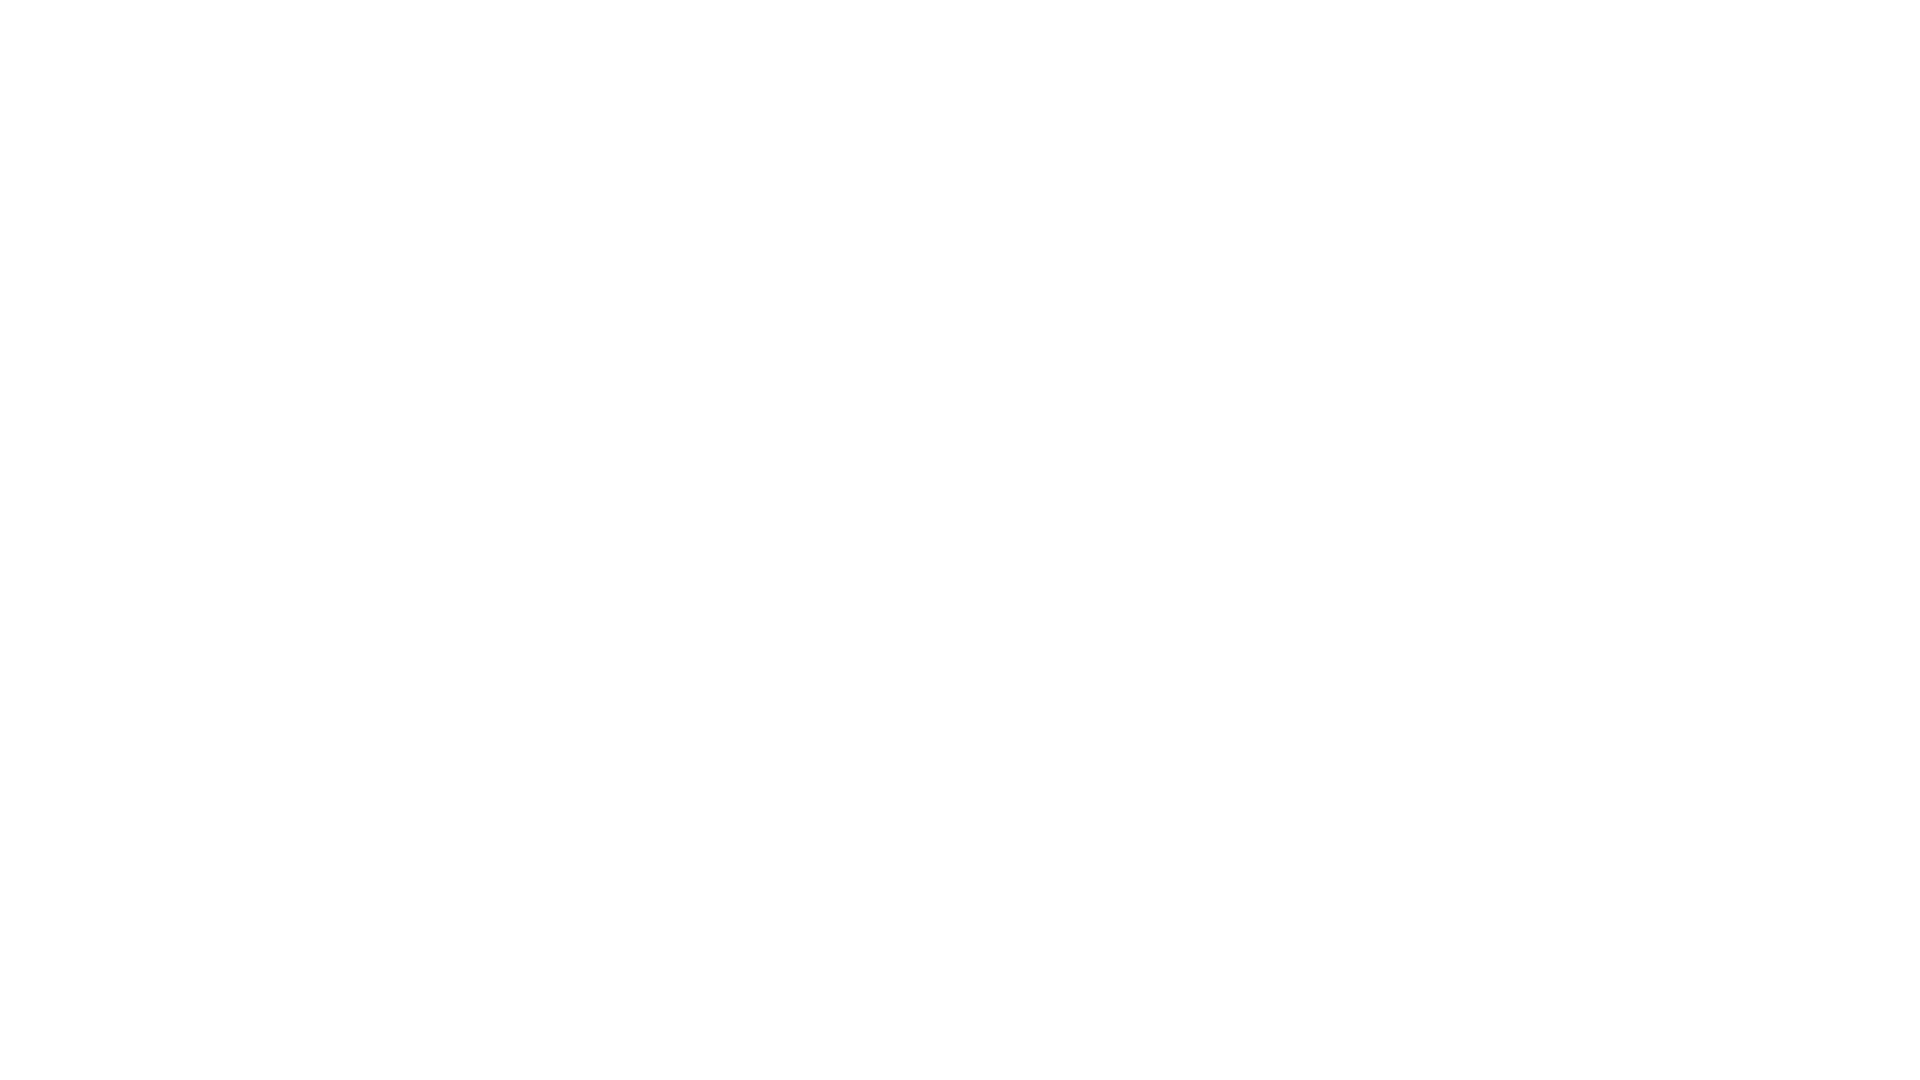

In [41]:
soup=BeautifulSoup(pages.content,"lxml")
soup

In [42]:
page=soup.find_all(class_="ab-company-result-card")
len(page)

30

In [43]:
first=page[5]
first

<div class="ab-company-result-card" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="6" itemprop="position"/> <meta content="Magnum" itemprop="name"/> <meta content="Magnum overview" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/magnum-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/magnum.jpg" itemprop="image"/> <div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="Magnum logo" class="lazy" data-src="https://static.ambitionbox.com/alpha/company/photos/logos/magnum.jpg" height="100" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg" width="100"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left"><a href="/overview/magnum-overview"><h2 class="company-name bold-title-l" ti

In [44]:
company_name=first.find(class_="company-name").get_text().strip()
company_name

'Magnum'

In [45]:
company_rating=first.find(class_="rating").get_text().strip()
company_rating

'3.5'

In [46]:
company_reivew=first.find(class_="caption-subdued-large").get_text().strip()
company_reivew

'61'

In [61]:
ci=[f.get_text().strip() for f in first.find(class_="company-basic-info")]
company_info=ci[::2]
company_info

['Public', 'Bhopal + 13 more', '30 years old', '1k-5k Employees (Global)']

In [62]:
company_sector=company_info[0]
company_sector

'Public'

In [63]:
company_location=company_info[1]
company_location

'Bhopal + 13 more'

In [64]:
conpany_years=company_info[2]
conpany_years

'30 years old'

In [65]:
conpany_emp=company_info[-1]
conpany_emp

'1k-5k Employees (Global)'

In [85]:
g={'cs':[]}
try:
    com=first.find(class_="chips-block").get_text().replace("\t","").strip().replace("\n\n",',')
    if len(com)>1:
            g['cs'].append(com)
except AttributeError:
    g['cs'].append("")
print(g)

{'cs': ['Food Processing,Public,Bhopal']}


'Food Processing,Public,Bhopal'

In [53]:
basic=[f.get_text().strip().replace("\t","").split("\n") for f in first.find_all(class_="company-action-center")]
a=basic[0][::2]
b=a[1:]
s={}
for i in range(len(b)):
    if b[i]=="Reviews":
        if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
            s[b[i]]=b[i+1]
        else:
            s[b[i]]=""
    elif b[i]=="Salaries":
        if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
            s[b[i]]=b[i+1]
        else:
            s[b[i]]=""
    elif b[i]=='Interviews':
        if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
            s[b[i]]=b[i+1]
        else:
            s[b[i]]=""
    elif b[i]=='Jobs':
        if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
            s[b[i]]=b[i+1]
        else:
            s[b[i]]=""
s

{'Reviews': '61', 'Salaries': '316', 'Interviews': '7', 'Jobs': ''}

In [54]:
company_salaries=s['Salaries']
company_salaries

'316'

In [55]:
company_interview=s['Interviews']
company_interview

'7'

In [56]:
company_job=s['Jobs']
company_job

''

In [57]:

try:
    description=first.find(class_="description").get_text().strip()
except AttributeError:
    description = ""
print(description)

Magnum group is managed by a team of experienced professionals with extensive international expertise in their respective areas. Magnum Group is committed to providing complete customer satisfaction, ethical and transparent business practices, appropriate response to technological change and passion to get things done. Headquartered in Bhopal (MP) Magnum group commenced its operations in 1993.

Currently we are providing safety, security & utility management services to majorly all telecom giants like Bharti Infratel, Vodafone Essar Spacetel Ltd., Idea Cellular Ltd. & Multinational industrial units like ACC Ltd., HEG Ltd., Mandleshwar Thermal Power plant, Crompton Greaves Ltd. etc. with a team of 1500 security personnel placed at various organizations all over Madhya Pradesh. We also take the contract for providing trained manpower, casual/contract labour, equipment and allied items to fulfill the task of such contracts. We are pleased to introduce ourselves as foremost professional co

In [101]:
d={"company_name":[],"Ratings":[],"Rieview":[],"Salaries":[],"Interviews":[],"Jobs":[],"Company_Type":[],"Company_location":[],"Company_years":[],"Company_emp":[],"Company_Details":[],"Discription":[]}
d

{'company_name': [],
 'Ratings': [],
 'Rieview': [],
 'Salaries': [],
 'Interviews': [],
 'Jobs': [],
 'Company_Type': [],
 'Company_location': [],
 'Company_years': [],
 'Company_emp': [],
 'Company_Details': [],
 'Discription': []}

In [102]:
for i in range(1,101):
    url=f"https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&page={i}"
    header = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.5790.98 Safari/537.36"}
    pages=requests.get(url,headers=header)
    soup=BeautifulSoup(pages.content,"lxml")
    page=soup.find_all(class_="ab-company-result-card")
    for f in page:
        d['company_name'].append(f.find(class_="company-name").get_text().strip())
        d['Ratings'].append(f.find(class_="rating").get_text().strip())
        d['Rieview'].append(f.find(class_="caption-subdued-large").get_text().strip())
        
        basic=[x.get_text().strip().replace("\t","").split("\n") for x in f.find_all(class_="company-action-center")]
        a=basic[0][::2]
        b=a[1:]
        s={}
        for i in range(len(b)):
            if b[i]=="Salaries":
                if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
                    s[b[i]]=b[i+1]
                else:
                    s[b[i]]=""
            elif b[i]=='Interviews':
                if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
                    s[b[i]]=b[i+1]
                else:
                    s[b[i]]=""
            elif b[i]=='Jobs':
                if i<(len(b)-1) and re.match(r"[0-9.]+", b[i+1]):
                    s[b[i]]=b[i+1]
                else:
                    s[b[i]]=""
        
        d['Salaries'].append(s['Salaries'])
        d['Interviews'].append(s['Interviews'])
        d['Jobs'].append(s['Jobs'])
        
        
        
        ci=[x.get_text().strip() for x in f.find(class_="company-basic-info")]
        company_info=ci[::2]
        d["Company_Type"].append(company_info[0])
        d['Company_location'].append(company_info[1])
        d["Company_years"].append(company_info[2])
        d['Company_emp'].append(company_info[3])
        
        try:
            com=first.find(class_="chips-block").get_text().replace("\t","").strip().replace("\n\n",',')
            if len(com)>1:
                    d['Company_Details'].append(com)
        except AttributeError:
            d['Company_Details'].append("")
        
        
        try:
            description=f.find(class_="description").get_text().strip()
        except AttributeError:
            description = ""
        d['Discription'].append(description)
len(company_name),len('Ratings'),len('Rieview'),len('Salaries'),len('Interviews'),len('Jobs'),len('Company_Info'),len('Company_type'),len('Discription')

(6, 7, 7, 8, 10, 4, 12, 12, 11)

In [103]:
df=pd.DataFrame(d)
df

,company_name,Ratings,Rieview,Salaries,Interviews,Jobs,Company_Type,Company_location,Company_years,Company_emp,Company_Details,Discription
0,TCS,3.8,60.7k,849.9k,5.1k,45,Public,"Mumbai,Maharashtra + 280 more",55 years old,1 Lakh+ Employees (India),"Food Processing,Public,Bhopal",We ensure the highest levels of certainty and ...
1,Accenture,4.1,38.8k,555.1k,3.4k,11.3k,Public,Dublin + 139 more,34 years old,1 Lakh+ Employees (India),"Food Processing,Public,Bhopal",Accenture is a global professional services co...
2,Cognizant,3.9,35.3k,559.8k,3k,445,Private,Teaneck. New Jersey. + 109 more,29 years old,1 Lakh+ Employees (India),"Food Processing,Public,Bhopal","At Cognizant, we give organizations the insigh..."
3,Wipro,3.9,28.8k,411.1k,3k,415,Public,"Bangalore/Bengaluru,Karnataka + 235 more",78 years old,1 Lakh+ Employees (India),"Food Processing,Public,Bhopal","Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WI..."
4,ICICI Bank,4.0,28.8k,215.9k,1.6k,208,Public,"Mumbai,Maharashtra + 1170 more",29 years old,1 Lakh+ Employees (India),"Food Processing,Public,Bhopal",ICICI Bank is a leading private sector bank in...
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Apparel Group,3.6,208,1.1k,15,4,Private,"Dubai,Dubai + 22 more",24 years old,501-1k Employees (India),"Food Processing,Public,Bhopal",Apparel Group is a global fashion and lifestyl...
2995,ReGen Powertech,4.0,208,798,5,,Private,"Chennai,Tamil Nadu + 17 more",17 years old,501-1k Employees (India),"Food Processing,Public,Bhopal",ReGen Powertech is committed to providing an a...
2996,Shree Baidyanath...,3.8,208,1.2k,9,10,Private,"Allahabad/Prayagraj,Uttar Pradesh + 27 more",106 years old,501-1k Employees (India),"Food Processing,Public,Bhopal","""Baidyanath publishes a number of books on Ayu..."
2997,Signode,4.1,208,1.5k,12,1,Private,"Glenview,Illinois + 25 more",110 years old,501-1k Employees (India),"Food Processing,Public,Bhopal",Signode is a global manufacturer of steel and ...


In [104]:
df.to_csv("Ambition_box.csv",index=False)